# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Yogic]
- **Email:** [yogicrhama@gmail.com]
- **ID Dicoding:** [yogocik]

## Menentukan Pertanyaan Bisnis

- Berapa catatan temperatur terendah dan tertinggi pada tahun 2013 dan di statiun mana?  
- Bagaimana korelasi antara rata-rata suhu udara, curah hujan, dan karbon monoksida pada tahun 2013 berdasarkan catatan stasiun pada pertanyaan awal?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [2]:
# Load File data
data_dir = './data'
file_list = [x for x in os.listdir(data_dir) if x.endswith('.csv')]
# Store data into key-value variable
data_map = {doc.split("_")[2]:pd.read_csv(os.path.join(data_dir,doc)) for doc in file_list}
data_map.keys()

dict_keys(['Gucheng', 'Changping', 'Dongsi', 'Nongzhanguan', 'Shunyi', 'Aotizhongxin', 'Wanshouxigong', 'Guanyuan', 'Dingling', 'Huairou', 'Tiantan', 'Wanliu'])

In [3]:
data_map['Changping'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [3]:
# Merge data
sensor_df = pd.concat(data_map.values(), axis=0, ignore_index=True)
set(sensor_df['station'].to_list())

{'Aotizhongxin',
 'Changping',
 'Dingling',
 'Dongsi',
 'Guanyuan',
 'Gucheng',
 'Huairou',
 'Nongzhanguan',
 'Shunyi',
 'Tiantan',
 'Wanliu',
 'Wanshouxigong'}

In [4]:
stations = []
for station in data_map.keys():
    stations.append(*set(data_map[station]['station'].to_list()))
len(stations)

12

In [5]:
dict(sorted(
    {key: len(val) for key, val in data_map.items()}.items(), 
    key=lambda item: item[1]
    )
)

{'Gucheng': 35064,
 'Changping': 35064,
 'Dongsi': 35064,
 'Nongzhanguan': 35064,
 'Shunyi': 35064,
 'Aotizhongxin': 35064,
 'Wanshouxigong': 35064,
 'Guanyuan': 35064,
 'Dingling': 35064,
 'Huairou': 35064,
 'Tiantan': 35064,
 'Wanliu': 35064}

**Insight:**
- Ada 12 stasiun sensor yang mengirimkan data
- Ada sekitar 420768 total data dari semua stasiun
- Setiap stasiun memiliki sekitar 35k baris data

### Assessing Data

In [5]:
sensor_df = pd.concat(data_map.values())
sensor_df.head(1)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng


In [28]:
sensor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420746 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [6]:
# Null-contained columns
null_columns = [x[0] for x in filter(lambda x: x[1] > 0, sensor_df.isna().sum().to_dict().items())]
','.join(null_columns)

'PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM'

**Insight:**
- Ada beberapa nilai kosong atau tidak diketahui pada kolom tertentu seperti PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
- Data terdiri atas kolom dengan 2 datatype string dan 16 datatype numeric (11 float dan 5 integer)
- Sebagian kolom data memiliki titik terendah dibawah 0 seperti TEMP dan DEWP

### Cleaning Data

In [29]:
sensor_df.head(1)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng


In [31]:
null_columns

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'WSPM']

In [7]:
# Replace null value in numeric columns
for station in data_map.keys():
    for col in null_columns:
        data_map[station][col] = data_map[station][col].interpolate(method='linear', limit_direction='backward')
    data_map[station]['wd'] = data_map[station]['wd'].fillna("UNKNOWN")

/tmp/ipykernel_6438/1588663299.py:4: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_map[station][col] = data_map[station][col].interpolate(method='linear', limit_direction='backward')


In [7]:
data_map['Gucheng'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [8]:
sensor_df = pd.concat(data_map.values())
sensor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [9]:
sensor_df.to_csv("dashboard/all_data.csv")

**Insight:**
- Mengganti value kosong dengan cara tertentu seperti Enum 'UNKNOWN' dan interpolasi hasil (karena berupa data sensor yang kontinyu)

## Exploratory Data Analysis (EDA)

### Explore ...

In [55]:
# Show statistics of all columns
stats_df = sensor_df.describe(include='all').T
stats_df['IQR'] = stats_df['75%'] - stats_df['25%']
stats_df['range'] = stats_df ['max'] - stats_df['min']
stats_df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,IQR,range
No,420768.0,NaN,NaN,NaN,17532.5,10122.116943,1.0,8766.75,17532.5,26298.25,35064.0,17531.5,35063.0
year,420768.0,NaN,NaN,NaN,2014.66256,1.177198,2013.0,2014.0,2015.0,2016.0,2017.0,2.0,4.0
month,420768.0,NaN,NaN,NaN,6.52293,3.448707,1.0,4.0,7.0,10.0,12.0,6.0,11.0
day,420768.0,NaN,NaN,NaN,15.729637,8.800102,1.0,8.0,16.0,23.0,31.0,15.0,30.0
hour,420768.0,NaN,NaN,NaN,11.5,6.922195,0.0,5.75,11.5,17.25,23.0,11.5,23.0
PM2.5,420768.0,NaN,NaN,NaN,79.839718,80.950217,2.0,20.0,55.0,111.0,999.0,91.0,997.0
PM10,420768.0,NaN,NaN,NaN,104.910268,92.431422,2.0,36.0,82.0,145.0,999.0,109.0,997.0
SO2,420768.0,NaN,NaN,NaN,15.91309,21.896609,0.2856,3.0,7.0,20.0,500.0,17.0,499.7144
NO2,420768.0,NaN,NaN,NaN,50.599018,35.171921,1.0265,23.0,43.0,71.0,290.0,48.0,288.9735
CO,420768.0,NaN,NaN,NaN,1235.682649,1161.790893,100.0,500.0,900.0,1500.0,10000.0,1000.0,9900.0


<Axes: >

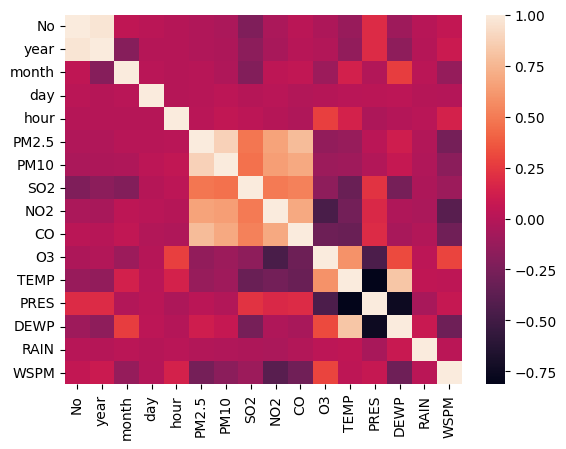

In [41]:
# Show correlation between every numeric columns
sns.heatmap(sensor_df.corr(method='pearson', numeric_only=True))

**Insight:**
- Ada yang memiliki korelasi yang berbanding lurus seperti PM2.5 dengan CO, PM2.5 dengan NO2, dst (heatmap)
- Ada yang memiliki korelasi yang berbanding terbalik seperti TEMP dengan PRES, RAIN dengan PRES, dst (heatmap)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa catatan temperatur terendah dan tertinggi pada tahun 2013 dan di stasiun mana?

In [68]:
temps_2013 = pd.DataFrame.from_records(
    sensor_df.loc[sensor_df['year'] == 2013].groupby(by='station').agg(
    temp_min=pd.NamedAgg(column="TEMP", aggfunc="min"),
    temp_avg=pd.NamedAgg(column="TEMP", aggfunc="mean"),
    temp_max=pd.NamedAgg(column="TEMP", aggfunc="max"),
).to_records()
)
temps_2013

,station,temp_min,temp_avg,temp_max
0,Aotizhongxin,-9.4,15.497740,37.9
1,Changping,-9.6,15.961397,37.9
2,Dingling,-9.6,15.961397,37.9
3,Dongsi,-8.5,15.963657,37.5
4,Guanyuan,-9.4,15.497740,37.9
5,Gucheng,-8.0,15.932823,37.7
6,Huairou,-11.6,14.660335,36.9
7,Nongzhanguan,-8.5,15.963657,37.5
8,Shunyi,-9.9,15.535103,37.8
9,Tiantan,-8.5,15.963657,37.5


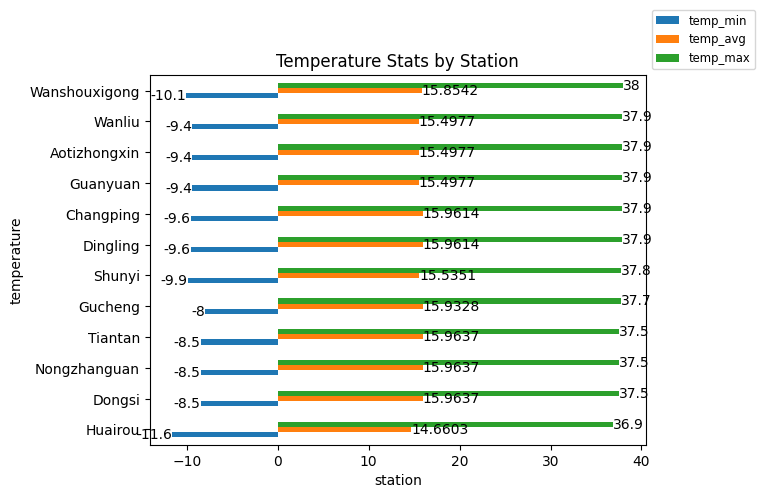

In [85]:
ax = temps_2013.sort_values(by='temp_max', ascending=True).plot(kind='barh', 
                xlabel='station', 
                legend='reverse',
                x='station',
                title='Temperature Stats by Station',
                ylabel='temperature')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)

### Jawaban 1: Pada tahun 2013, temperature terendah tercatat -11.6 di stasiun Huairou dan temperature tertinggi sebesar 38 di stasiun Wanshouxigong

### Pertanyaan 2: Bagaimana korelasi antara rata-rata bulanan suhu udara, curah hujan, dan karbon monoksida pada tahun 2013 berdasarkan catatan stasiun pada pertanyaan awal?

In [88]:
sensor_df.head(1)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,5.0,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng


In [87]:
set(sensor_df['station'].to_list())

{'Aotizhongxin',
 'Changping',
 'Dingling',
 'Dongsi',
 'Guanyuan',
 'Gucheng',
 'Huairou',
 'Nongzhanguan',
 'Shunyi',
 'Tiantan',
 'Wanliu',
 'Wanshouxigong'}

In [9]:
# Aggregate data
target_df = sensor_df.loc[sensor_df['station'].isin(['Wanshouxigong', 'Huairou'])]
target_stat_df = pd.DataFrame.from_records(
    target_df.loc[target_df['year'] == 2013].groupby(by=['station', 'month']).agg(
        temp_avg=pd.NamedAgg(column="TEMP", aggfunc="mean"),
        rain_avg=pd.NamedAgg(column="RAIN", aggfunc="mean"),
        co_avg=pd.NamedAgg(column="CO", aggfunc="mean"),
    ).to_records()
)
target_stat_df

,station,month,temp_avg,rain_avg,co_avg
0,Huairou,3,4.819624,0.017473,1194.713038
1,Huairou,4,11.543056,0.017500,752.731944
2,Huairou,5,20.929032,0.005242,961.991935
3,Huairou,6,22.798056,0.183889,1085.250000
4,Huairou,7,26.300672,0.327554,872.435484
5,Huairou,8,25.807796,0.100941,749.529570
6,Huairou,9,19.435972,0.052917,1010.829167
7,Huairou,10,12.009140,0.016667,919.018817
8,Huairou,11,4.873611,0.000000,979.861111
9,Huairou,12,-1.913306,0.000000,1353.696237


Text(0.5, 1.0, 'Wanshouxigong Coorelation Heatmap')

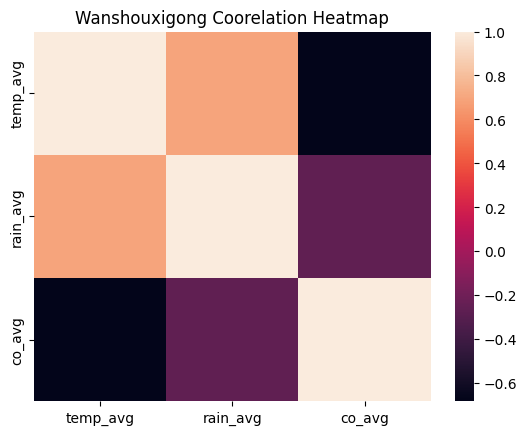

In [11]:
# Correlation on Wanshouxhigong station
station_df = target_stat_df.loc[(target_stat_df['station'] == 'Wanshouxigong')][target_stat_df.columns[~target_stat_df.columns.isin(['month'])]]
ax = plt.axes()
sns.heatmap(station_df.corr(method='pearson', numeric_only=True), ax=ax)
ax.set_title("Wanshouxigong Coorelation Heatmap")

<Axes: >

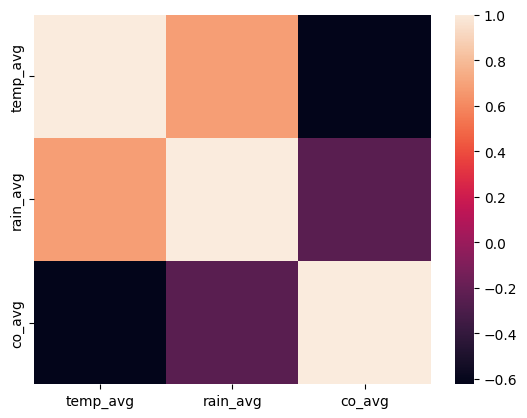

In [101]:
# Correlation on Huairou station
station_df = target_stat_df.loc[(target_stat_df['station'] == 'Huairou')][target_stat_df.columns[~target_stat_df.columns.isin(['month'])]]
sns.heatmap(station_df.corr(method='pearson', numeric_only=True))

**Insight:**
- temperature terendah tercatat -11.6 di stasiun Huairou dan temperature tertinggi sebesar 38 di stasiun Wanshouxigong
- Ada yang berbanding terbalik seperti temperature dengan kadar CO sedangkan curah hujan tidak terlalu berkaitan dengan kadar CO

## Analisis Lanjutan (Opsional)

## Conclusion

- Beberapa stasiun memiliki titik temperature terendah dan tertinggi akan tetapi secara keseluruhan titik terendah tercatat pada stasiun Huairou dengan nilai -11.6 dan titik tertinggi tercatat pada stasiun Wanshouxigong dengan nilai 38
- Grafik heatmap menunjukkan korelasi untuk rata-rata bulanan pada stasiun Huairou dan Wanshouxigong yang mana menunjukkan pola yang sama dimana temperature berbanding terbalik dengan kadar CO dan kadar CO tidak terlalu berkaitan dengan curah hujan dilihat dari correlation matrix / value.